In [48]:
import numpy as np
import pandas as pd 
import seaborn as sns
# Loading in the train data and viewing the first 5 rows
train_data = pd.read_csv(r'C:\Users\Abdullah\OneDrive\Documents\Titanic\train.csv')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# Loading in the test data
test_data = pd.read_csv(r'C:\Users\Abdullah\OneDrive\Documents\Titanic\test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


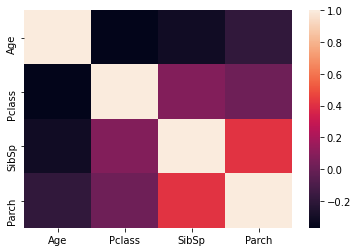

In [61]:
# Visualizing correlation between the data (we can see that age and ticket class has a negative correlation)
sns.heatmap(train_data[[ "Age","Pclass", "SibSp", "Parch"]].corr())

In [93]:
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


#Selecting the prediction target feature i.e "Survived"
y= train_data["Survived"]

# We select four features (Pclass, Sex, SibSp and Parch) and check for a pattern in them
features= ["Pclass", "Sex", "SibSp", "Parch"]
X= pd.get_dummies(train_data[features])
X_test= pd.get_dummies(test_data[features])

# Create the model using RandomForestClassifier
titanic_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# fit the data
titanic_model.fit(X,y)

RandomForestClassifier(max_depth=5, random_state=1)

In [104]:
# make predictions
predictions = titanic_model.predict(X_test)
#print(predictions)

output = pd.DataFrame({'PassengerID':test_data.PassengerId, 'Survived':predictions})
print(output)
# We'll calculate the cross validation scores
scores=cross_val_score(titanic_model,train_X,train_y)
print(f"Cross validation scores: {scores}")
# Calculate the mean of the cross validation scores 
print(f"Accuracy: {np.mean(scores):.5f}")


     PassengerID  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
Cross validation scores: [0.68656716 0.76119403 0.79850746 0.82706767 0.78195489]
Accuracy: 0.77106


In [102]:
#Using a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
X_testt= pd.get_dummies(test_data[features])

# Specify Model
dec_tree_model = DecisionTreeClassifier(random_state=1)
dec_tree_model.fit(X,y)

val_predictions= dec_tree_model.predict(X_testt)

#Output the passengers and whether they survived or not
output = pd.DataFrame({'PassengerID':test_data.PassengerId, 'Survived':val_predictions})
print(output)

# Calculate the cross validation scores
cross_val=cross_val_score(dec_tree_model,train_X,train_y)
print(f"Cross validation scores: {cross_val}")
# Calculate the mean of the cross validation scores
print(f"Accuracy: {np.mean(cross_val):.5f}")

     PassengerID  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
[0.69402985 0.75373134 0.79104478 0.82706767 0.78195489]
Accuracy: 0.76957


In [ ]:
'''We can see that the accuracy when using the Decision tree classifier (0.76957) is lower than the accuracy obtained when 
using the random forest classifier (0.77106). This suggests that using Random Forests are better for predicting whether 
people survive or not in the Titanic shipwreck'''